In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from fractions import Fraction
from scipy.optimize import basinhopping
from scipy.optimize import minimize
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
def fun2(x: list):
    return np.exp((x[0] + 3*x[1] - 0.1)) + np.exp((x[0] - 3*x[1] - 0.1)) + np.exp((-x[0] - 0.1))

def grad2(x: list) -> float:
    return np.array([np.exp((x[0] + 3*x[1] - 0.1)) + np.exp((x[0] - 3*x[1] - 0.1)) - np.exp((-x[0] - 0.1)), 3*np.exp((x[0] + 3*x[1] - 0.1)) - 3*np.exp((x[0] - 3*x[1] - 0.1))])

In [3]:
def min_gd2_i(fun2, x0, grad2):
    alpha = 0.1
    beta = 0.7
    dx = -grad2(x0)
    mylist2 = []
    while (np.max(np.abs(dx)) > 1e-07):
        t = 1
        while fun2(x0+t*dx) > fun2(x0) - alpha*t*dx.T@dx:
            t *= beta
        mylist2.append(np.exp((x0[0] + 3*x0[1] - 0.1)) + np.exp((x0[0] - 3*x0[1] - 0.1)) + np.exp((-x0[0] - 0.1)))
        x0 = x0 + t*dx
        dx = -grad2(x0)
    return mylist2

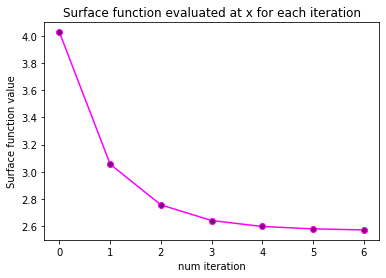

In [4]:
var2 = min_gd2_i(fun2, [-1,0.5], grad2) 
plt.plot(var2[0:7], color='magenta', marker='o',mfc='purple')
plt.ylabel('Surface function value') 
plt.xlabel('num iteration') 
plt.title("Surface function evaluated at x for each iteration") 
plt.show() 

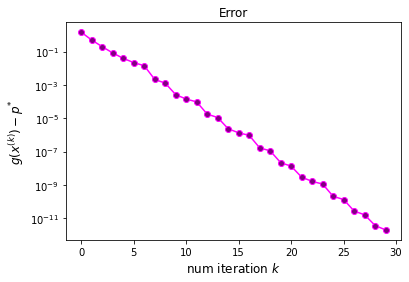

In [5]:
ervar2  = [y - var2[-1] for y in var2]
plt.plot(ervar2[:30], color='magenta', marker='o',mfc='purple')
plt.ylabel(r"$g(x^{(k)}) - p^{*}$", fontsize=12) 
plt.xlabel(r'num iteration $k$', fontsize=12) 
plt.title('Error')
plt.yscale('log')
plt.show() 

In [6]:
def min_gd2_ii(fun2, x0, grad2):
    alpha = 0.1
    beta = 0.7
    dx = -grad2(x0)
    while (np.max(np.abs(dx)) > 1e-07):
        t = 1
        while fun2(x0+t*dx) > fun2(x0) - alpha*t*dx.T@dx:
            t *= beta
        x0 = x0 + t*dx
        dx = -grad2(x0)
    return list(x0)

In [7]:
def min_gd2_iii(fun2, x0, grad2):
    alpha = 0.1
    beta = 0.7
    dx = -grad2(x0)
    minsequencelist = []
    while (np.max(np.abs(dx)) > 1e-07):
        t = 1
        while fun2(x0+t*dx) > fun2(x0) - alpha*t*dx.T@dx:
            t *= beta
        minsequencelist.append(list(x0))
        x0 = x0 + t*dx
        dx = -grad2(x0)
    minsequencelist.append(list(x0))
    return(minsequencelist)

In [8]:
def x_one(lst: list[list]) -> list:
    mylist = []
    for i in lst:
        mylist.append(i[0])
    return mylist

def x_two(lst: list[list]) -> list:
    mylist = []
    for i in lst:
        mylist.append(i[1])
    return mylist

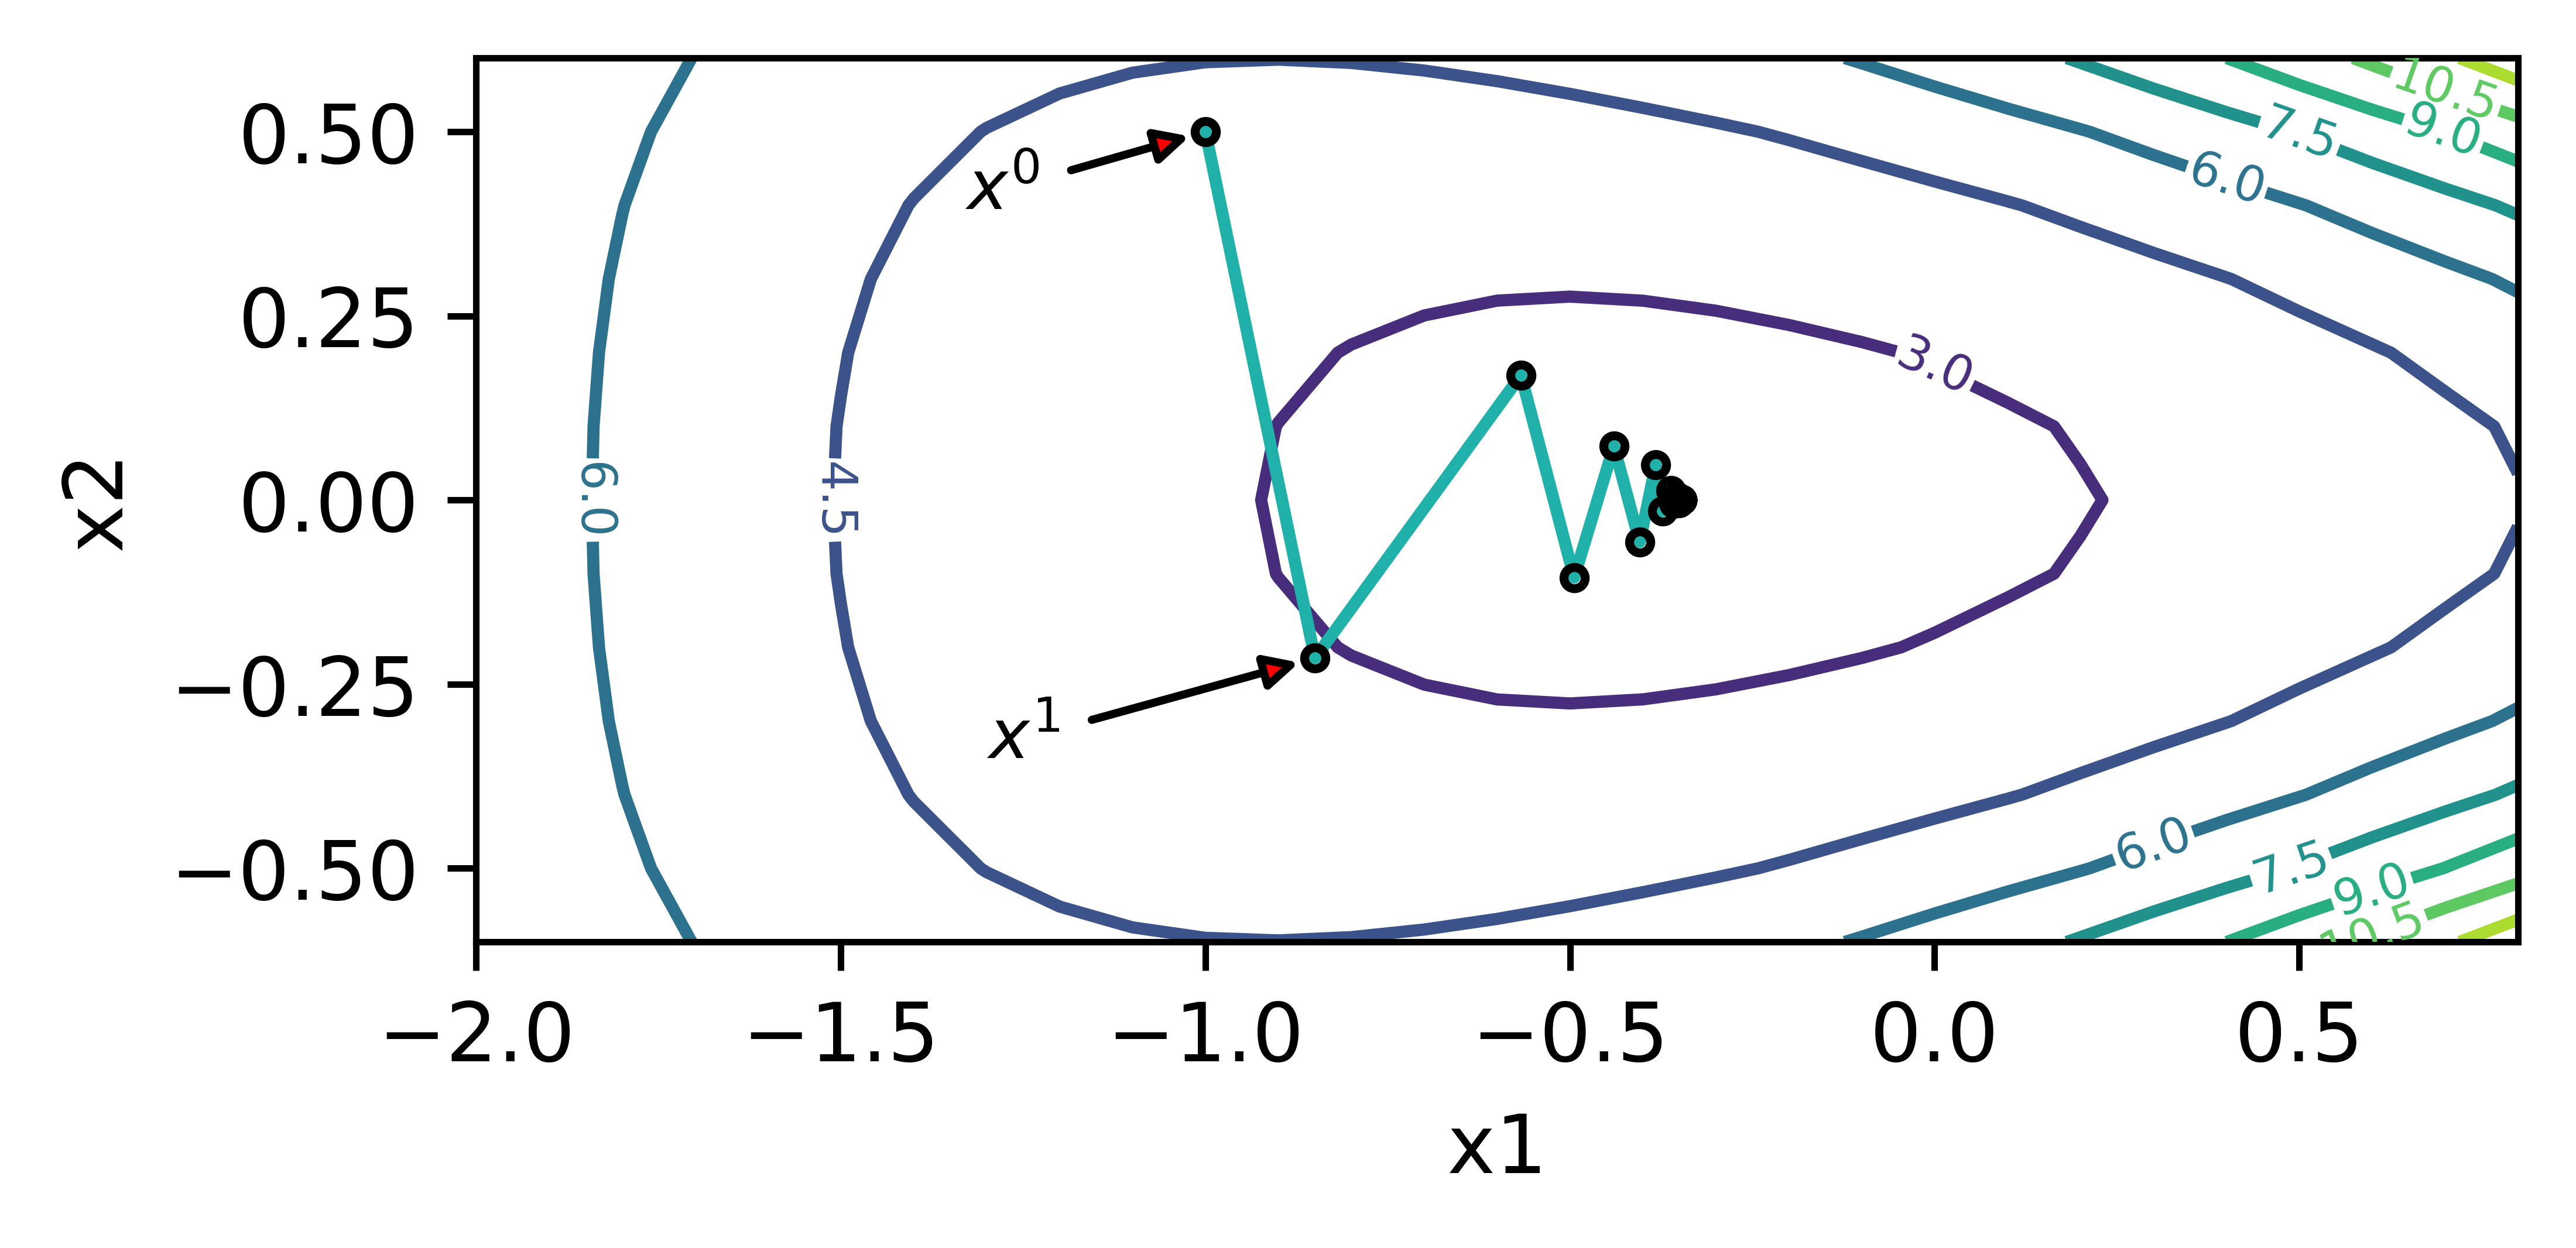

In [9]:
width_of_panel = 4.5 
height_of_panel = 2
d = 1000
plt.figure(figsize=(width_of_panel, height_of_panel), dpi=d)
x1 = np.arange(-2, 0.9, 0.1)
x2 = np.arange(-0.6, 0.7, 0.1)
x1, x2 = np.meshgrid(x1, x2)
z = np.exp((x1 + 3*x2 - 0.1)) + np.exp((x1 - 3*x2 - 0.1)) + np.exp((-x1 - 0.1))
cp = plt.contour(x1, x2, z)
plt.clabel(cp, inline=1, fontsize=6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_one(min_gd2_iii(fun2, [-1,0.5], grad2)), x_two(min_gd2_iii(fun2, [-1,0.5], grad2)), color='lightseagreen')
plt.plot(x_one(min_gd2_iii(fun2, [-1,0.5], grad2))[:], x_two(min_gd2_iii(fun2, [-1,0.5], grad2))[:], "or", markerfacecolor="None", markeredgecolor='black', markeredgewidth=1.1, markersize=2.6)
plt.annotate("$x^0$", fontsize = 8.5, xy=(-1,0.5), xytext=(-1.33,0.395), arrowprops=dict(arrowstyle = '-|>', connectionstyle = 'Arc3',facecolor='r'))
plt.annotate("$x^1$", fontsize = 8.5, xy=(-0.8498286423309029,-0.21474344992625538), xytext=(-1.3,-0.35), arrowprops=dict(arrowstyle = '-|>', connectionstyle = 'Arc3',facecolor='r'))
plt.show()